In [98]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.preprocessing import Imputer
from keras_model import KerasModel
import math
import random
import matplotlib.pyplot as plt
import tensorflow as tf

In [99]:
train_path = "data/train.csv"
test_path = "data/test.csv"

In [100]:
train_data = pd.read_csv(train_path, sep=';', dtype=np.float64, na_values='None')
test_data = pd.read_csv(test_path, sep=';', dtype=np.float64, na_values='None')

In [101]:
X = train_data.drop('cardio', axis=1)
Y = train_data[['cardio']]

In [102]:
X.head()

id      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  0.0  18393.0     2.0   168.0    62.0  110.0   80.0          1.0   1.0   
1  1.0  20228.0     1.0   156.0    85.0  140.0   90.0          3.0   1.0   
2  2.0  18857.0     1.0   165.0    64.0  130.0   70.0          3.0   1.0   
3  3.0  17623.0     2.0   169.0    82.0  150.0  100.0          1.0   1.0   
4  4.0  17474.0     1.0   156.0    56.0  100.0   60.0          1.0   1.0   

   smoke  alco  active  
0    0.0   0.0     1.0  
1    0.0   0.0     1.0  
2    0.0   0.0     0.0  
3    0.0   0.0     1.0  
4    0.0   0.0     0.0

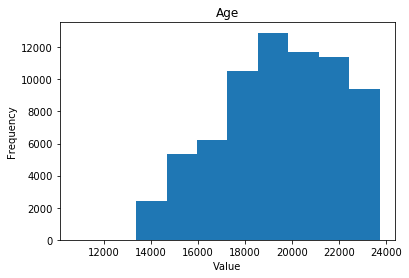

In [103]:
plt.hist(X['age'])
plt.title("Age")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [104]:
X['age'] = X['age'].apply(np.log1p, 0) - 9.5

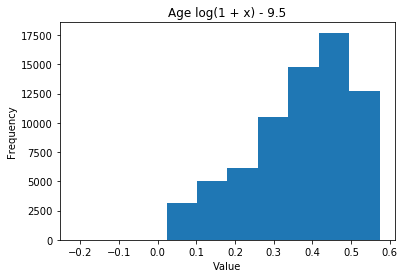

In [105]:
plt.hist(X['age'])
plt.title("Age log(1 + x) - 9.5")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

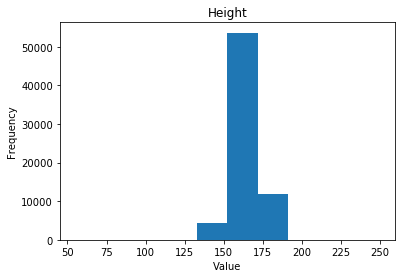

In [106]:
plt.hist(X['height'])
plt.title("Height")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

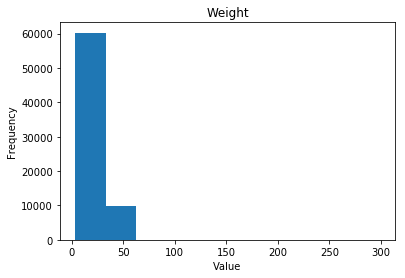

In [108]:
plt.hist(X['weight'] / (X['height'] / 100 * X['height'] / 100))
plt.title("Weight")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

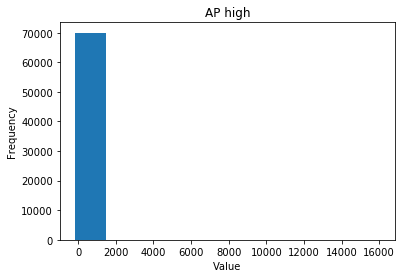

In [91]:
plt.hist(X['ap_hi'])
plt.title("AP high")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

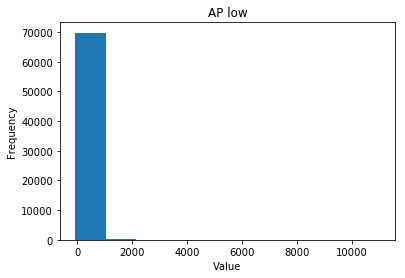

In [92]:
plt.hist(X['ap_lo'])
plt.title("AP low")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [93]:
X['ap_hi'] = X['ap_hi'].clip(80, 180)
X['ap_lo'] = X['ap_lo'].clip(50, 130)

In [115]:
X['ketle'] = X['weight'] / (X['height'] / 100.0 * X['height'] / 100.0)

In [116]:
X['ketle'] = X['ketle'].clip(17.5, 41)

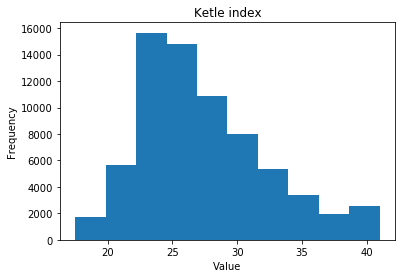

In [117]:
plt.hist(X['ketle'])
plt.title("Ketle index")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

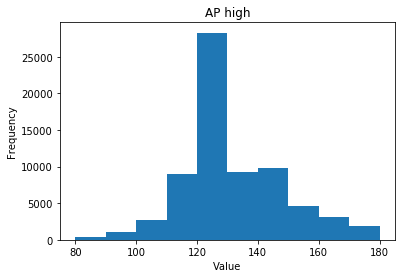

In [94]:
plt.hist(X['ap_hi'])
plt.title("AP high")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

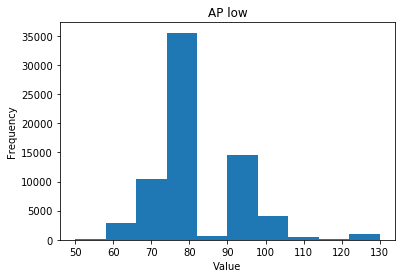

In [95]:
plt.hist(X['ap_lo'])
plt.title("AP low")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [118]:
mas = X['weight'] / (X['height'] / 100 * X['height'] / 100)
cc = 0
for ap in X['ketle']:
    if ap < 20:
        cc += 1
print(cc)

1860
